# Stroke Prognosis: Utilización y evaluación de los Modelos

<p>
Curso de Minería de Datos <br>
Autor: Cristian Pavez Hormazábal
</p>


In [11]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importación de modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB


# Importación de datos
dataset = pd.read_csv("all-data.csv")

In [2]:
formated_dataset = dataset.drop('id', axis=1)
formated_dataset['gender'] = formated_dataset['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
formated_dataset['ever_married'] = formated_dataset['ever_married'].map({'Yes': 1, 'No': 0})
formated_dataset['work_type'] = formated_dataset['work_type'].map({'Private': 4, 'Self-employed': 2, 'Govt_job': 3, 'children': 1, 'Never_worked': 0})
formated_dataset['Residence_type'] = formated_dataset['Residence_type'].map({'Rural': 0, 'Urban': 1})
formated_dataset['smoking_status'] = formated_dataset['smoking_status'].map({'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3})
formated_dataset['stroke'] = formated_dataset['stroke'].map({1: 0, 0: 1})

"""
models = {
    "Decision Tree": sk.tree.DecisionTreeClassifier(min_samples_leaf=3, random_state=42, max_depth=10, max_leaf_nodes=50),
    "Gaussian Naive Bayes": sk.naive_bayes.GaussianNB(),   
    "Bernoulli Naive Bayes": sk.naive_bayes.BernoulliNB(), 
    "SVM": sk.svm.SVC(probability=True),                   
    "Random Forest": sk.ensemble.RandomForestClassifier(),
    "XGB": xgb.XGBClassifier(random_state=42),
    "LGBM": lg.LGBMClassifier(random_state=42),
    "ExtraTrees": sk.ensemble.ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging ExtraTrees": sk.ensemble.BaggingClassifier(estimator=sk.ensemble.ExtraTreesClassifier(n_estimators=100, random_state=42), n_estimators=50, random_state=42)
}
"""

        

'\nmodels = {\n    "Decision Tree": sk.tree.DecisionTreeClassifier(min_samples_leaf=3, random_state=42, max_depth=10, max_leaf_nodes=50),\n    "Gaussian Naive Bayes": sk.naive_bayes.GaussianNB(),   \n    "Bernoulli Naive Bayes": sk.naive_bayes.BernoulliNB(), \n    "SVM": sk.svm.SVC(probability=True),                   \n    "Random Forest": sk.ensemble.RandomForestClassifier(),\n    "XGB": xgb.XGBClassifier(random_state=42),\n    "LGBM": lg.LGBMClassifier(random_state=42),\n    "ExtraTrees": sk.ensemble.ExtraTreesClassifier(n_estimators=100, random_state=42),\n    "Bagging ExtraTrees": sk.ensemble.BaggingClassifier(estimator=sk.ensemble.ExtraTreesClassifier(n_estimators=100, random_state=42), n_estimators=50, random_state=42)\n}\n'

In [3]:
clean_dataset = formated_dataset.dropna()

x1 = clean_dataset.drop('stroke', axis=1)
y1 = clean_dataset['stroke']


no_stroke_data = formated_dataset[formated_dataset['stroke'] == 1]
stroke_data = formated_dataset[formated_dataset['stroke'] == 0]
stroke_data_overrepresented = pd.concat([stroke_data] * 5, ignore_index=True)
balanced_dataset = pd.concat([stroke_data_overrepresented, no_stroke_data], ignore_index=True)
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
clean_dataset = balanced_dataset.dropna()

x2 = clean_dataset.drop('stroke', axis=1)
y2 = clean_dataset['stroke']


clean_dataset = formated_dataset.drop('bmi', axis=1)
clean_dataset = clean_dataset.dropna()

x3 = clean_dataset.drop('stroke', axis=1)
y3 = clean_dataset['stroke']


no_stroke_data = formated_dataset[formated_dataset['stroke'] == 1]
stroke_data = formated_dataset[formated_dataset['stroke'] == 0]
stroke_data_overrepresented = pd.concat([stroke_data] * 5, ignore_index=True)
balanced_dataset = pd.concat([stroke_data_overrepresented, no_stroke_data], ignore_index=True)
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
clean_dataset = balanced_dataset.drop('bmi', axis=1)
clean_dataset = clean_dataset.dropna()

x4 = clean_dataset.drop('stroke', axis=1)
y4 = clean_dataset['stroke']

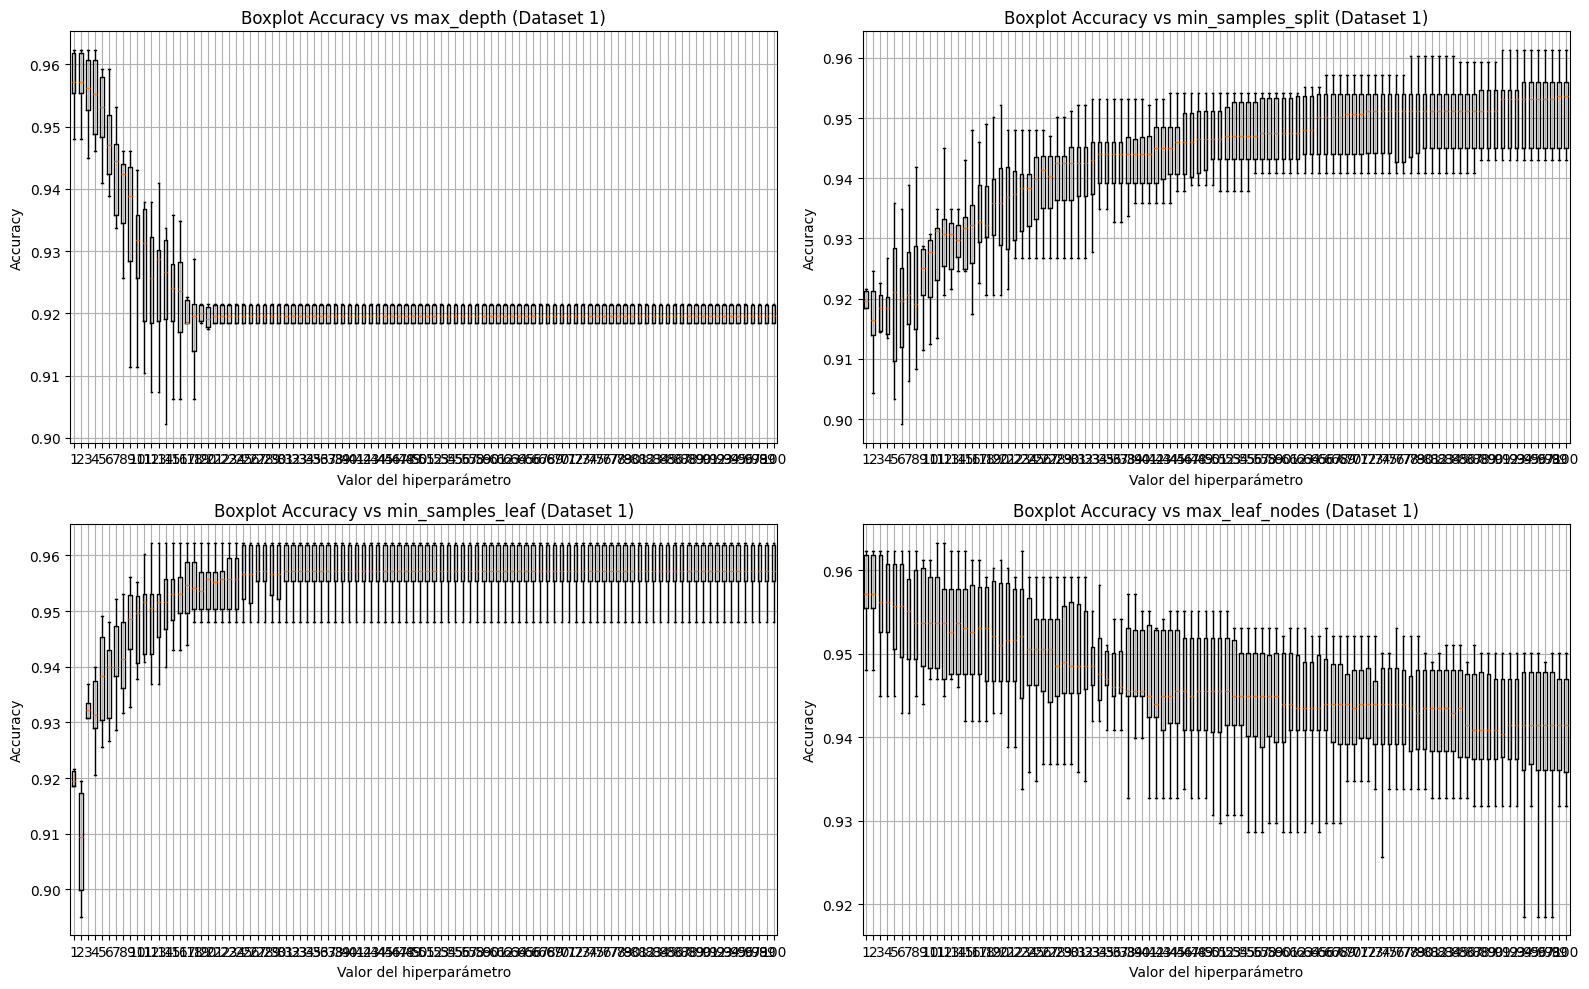

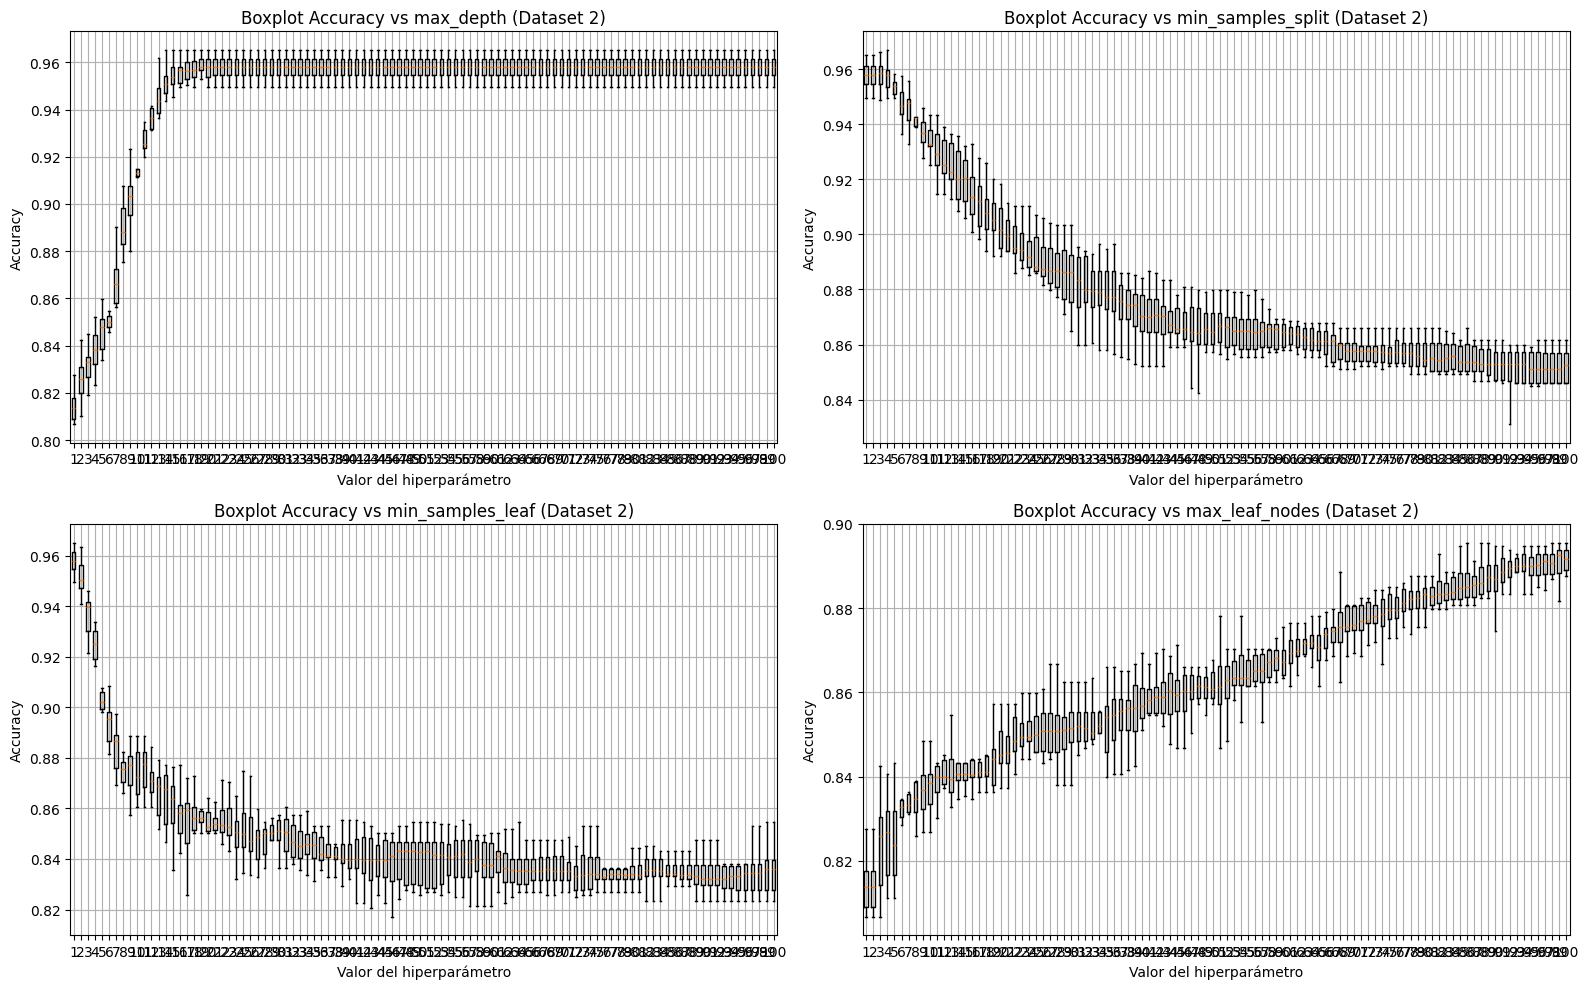

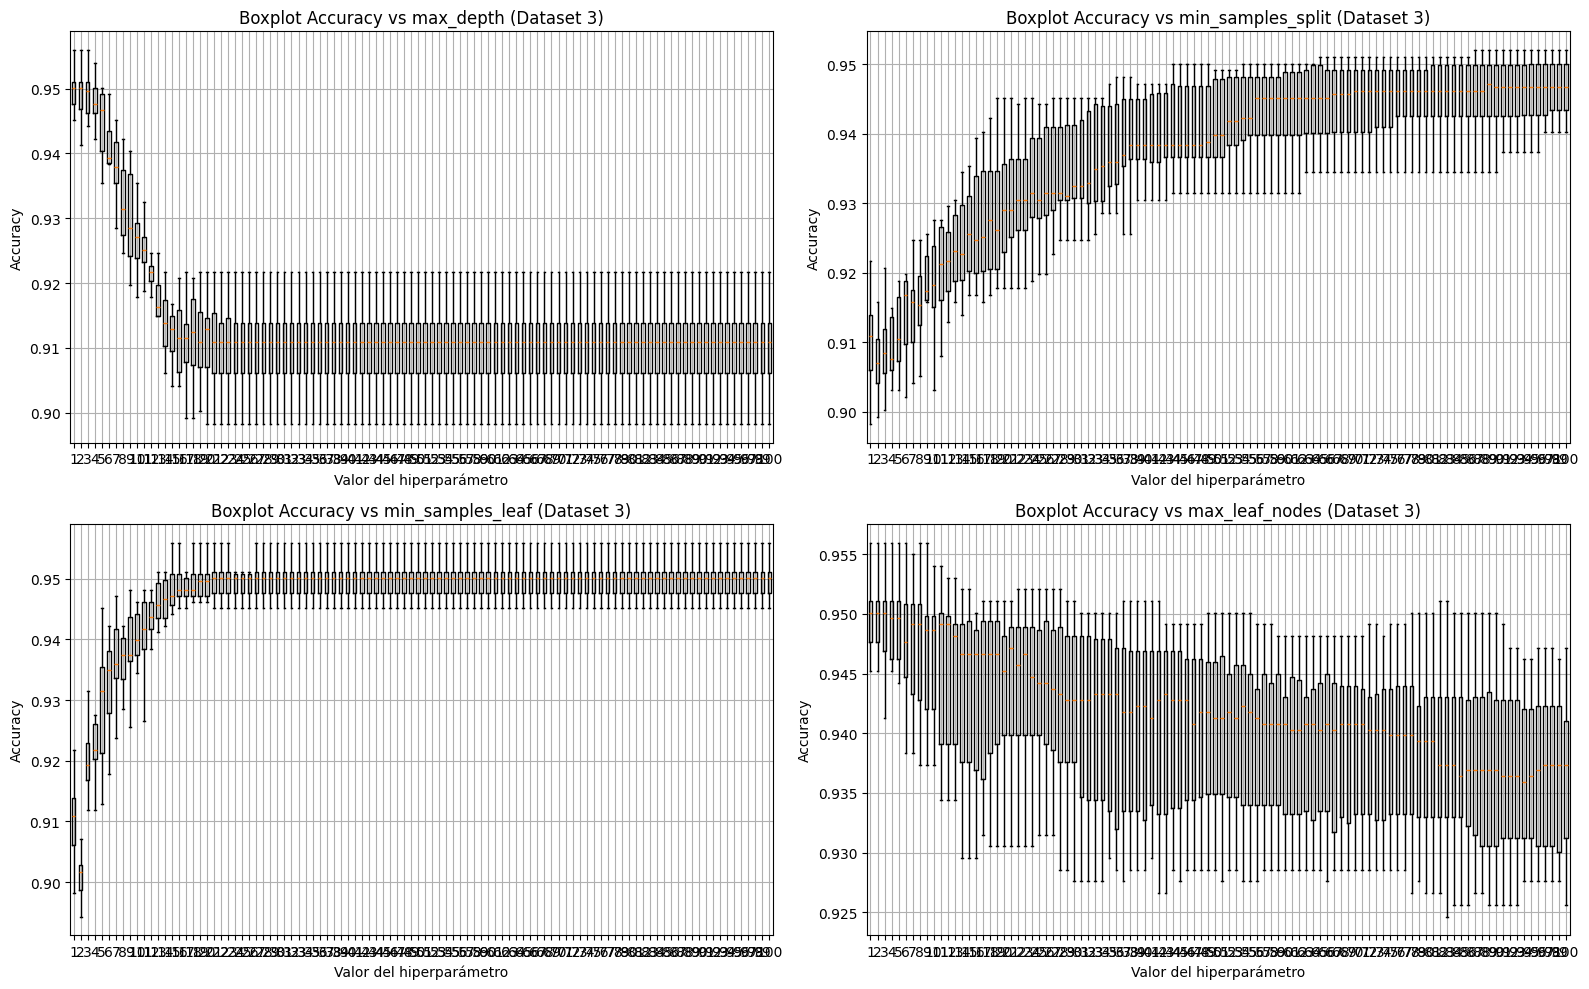

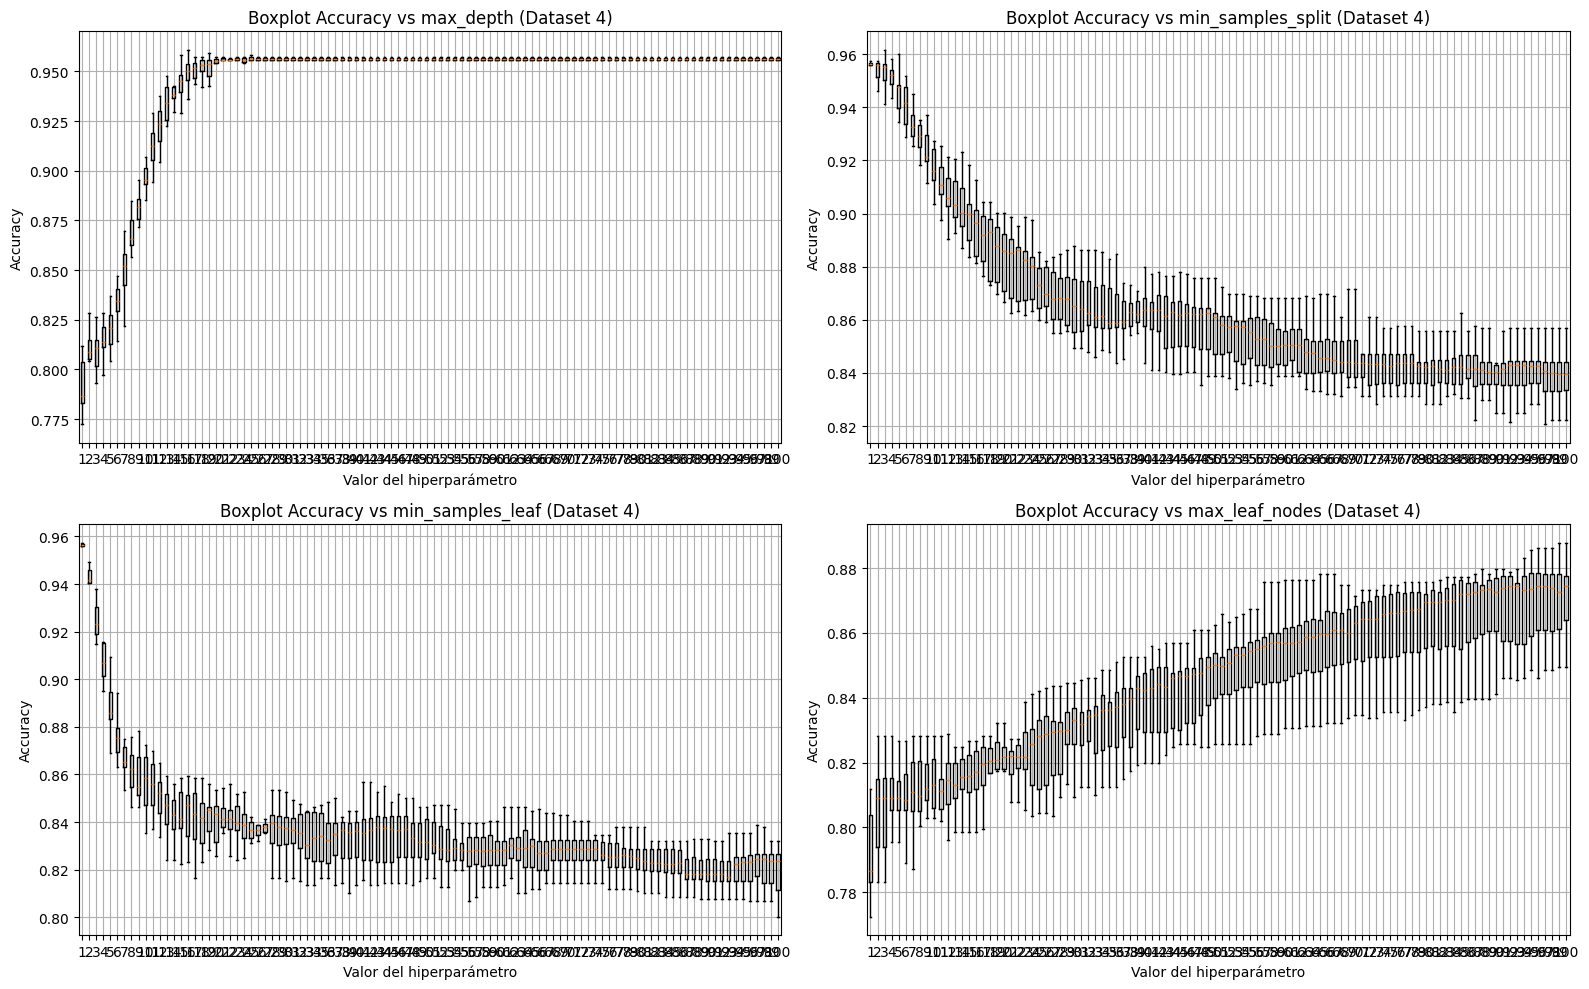

In [ ]:
param_range = range(1, 101)
xdata = [x1, x2, x3, x4]
ydata = [y1, y2, y3, y4]
n_repeats = 10

for i in range(4):
    results = {
        'max_depth': [],
        'min_samples_split': [],
        'min_samples_leaf': [],
        'max_leaf_nodes': []
    }
    # max_depth
    for d in param_range:
        accs = []
        for rep in range(n_repeats):
            x_train, x_test, y_train, y_test = train_test_split(xdata[i], ydata[i], test_size=0.2, random_state=rep)
            clf = DecisionTreeClassifier(max_depth=d, random_state=42)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            accs.append(accuracy_score(y_test, y_pred))
        results['max_depth'].append(accs)
    # min_samples_split
    for s in param_range:
        accs = []
        for rep in range(n_repeats):
            x_train, x_test, y_train, y_test = train_test_split(xdata[i], ydata[i], test_size=0.2, random_state=rep)
            clf = DecisionTreeClassifier(min_samples_split=s+1, random_state=42)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            accs.append(accuracy_score(y_test, y_pred))
        results['min_samples_split'].append(accs)
    # min_samples_leaf
    for l in param_range:
        accs = []
        for rep in range(n_repeats):
            x_train, x_test, y_train, y_test = train_test_split(xdata[i], ydata[i], test_size=0.2, random_state=rep)
            clf = DecisionTreeClassifier(min_samples_leaf=l, random_state=42)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            accs.append(accuracy_score(y_test, y_pred))
        results['min_samples_leaf'].append(accs)
    # max_leaf_nodes
    for n in param_range:
        accs = []
        for rep in range(n_repeats):
            x_train, x_test, y_train, y_test = train_test_split(xdata[i], ydata[i], test_size=0.2, random_state=rep)
            clf = DecisionTreeClassifier(max_leaf_nodes=n+1, random_state=42)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            accs.append(accuracy_score(y_test, y_pred))
        results['max_leaf_nodes'].append(accs)
    # Graficar boxplots
    plt.figure(figsize=(16, 10))
    for idx, (param, accs) in enumerate(results.items()):
        plt.subplot(2, 2, idx+1)
        plt.boxplot(accs, positions=param_range, showfliers=False)
        plt.xlabel('Valor del hiperparámetro')
        plt.ylabel('Accuracy')
        plt.title(f'Boxplot Accuracy vs {param} (Dataset {i+1})')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

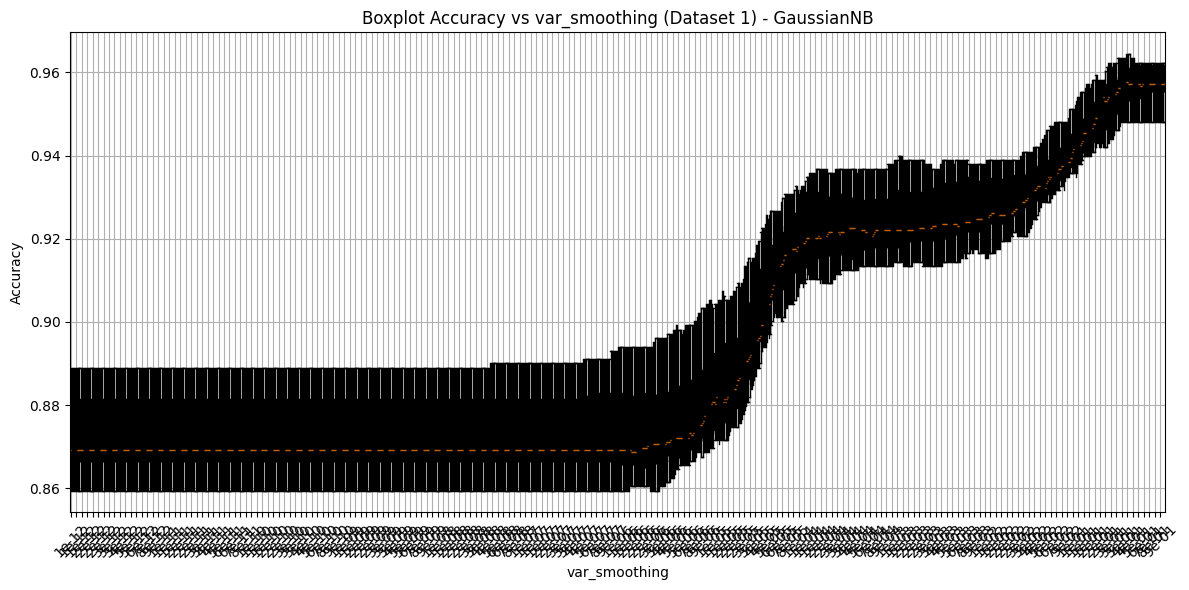

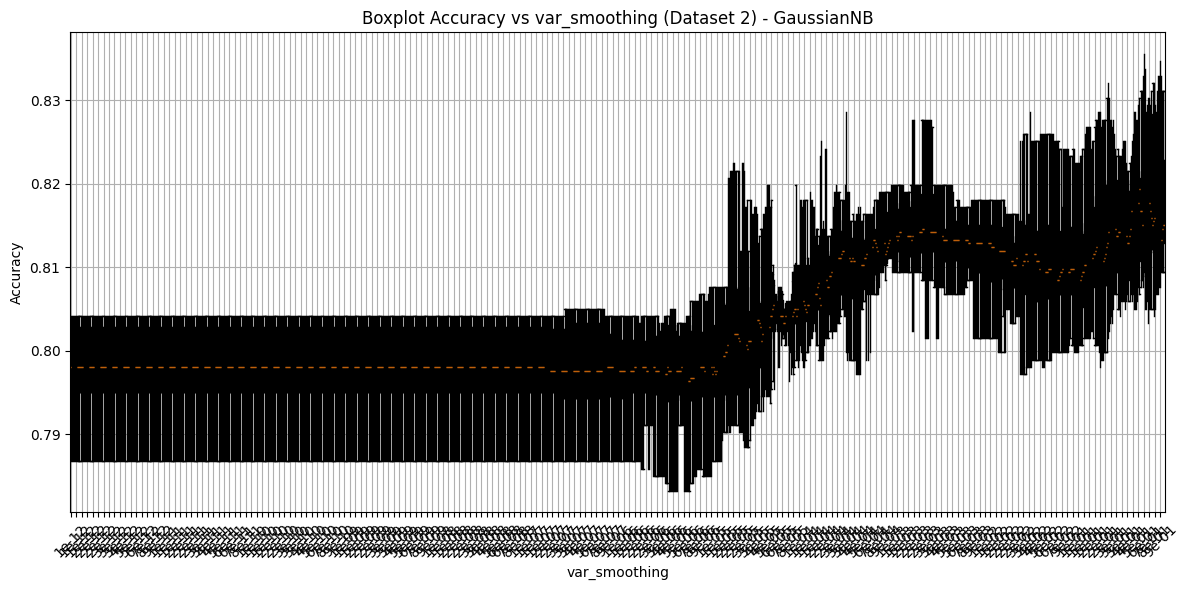

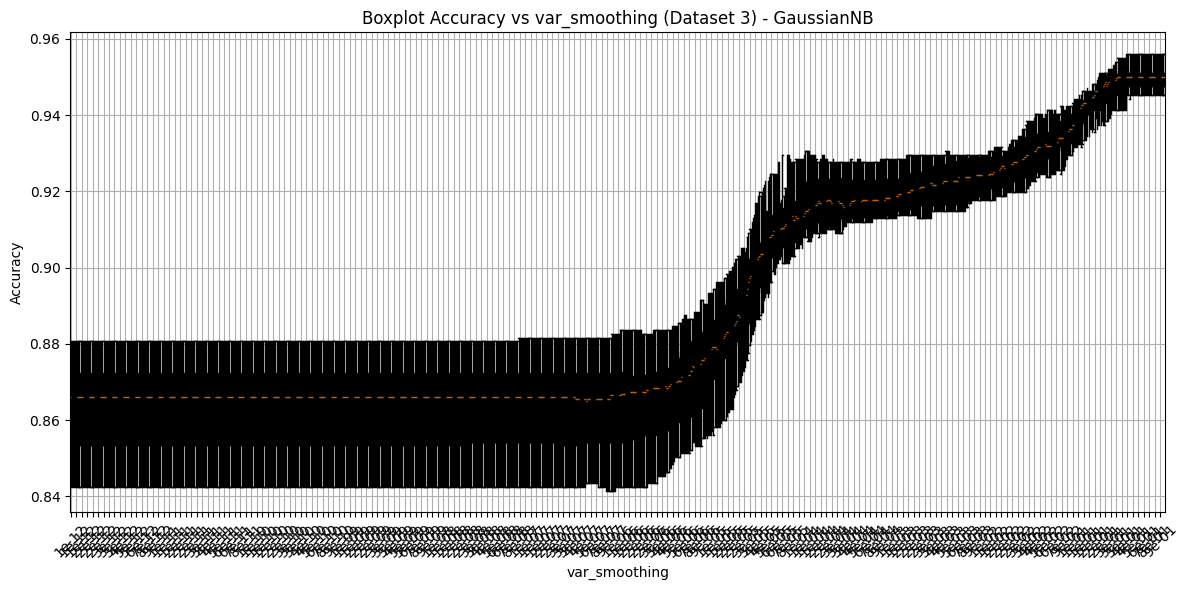

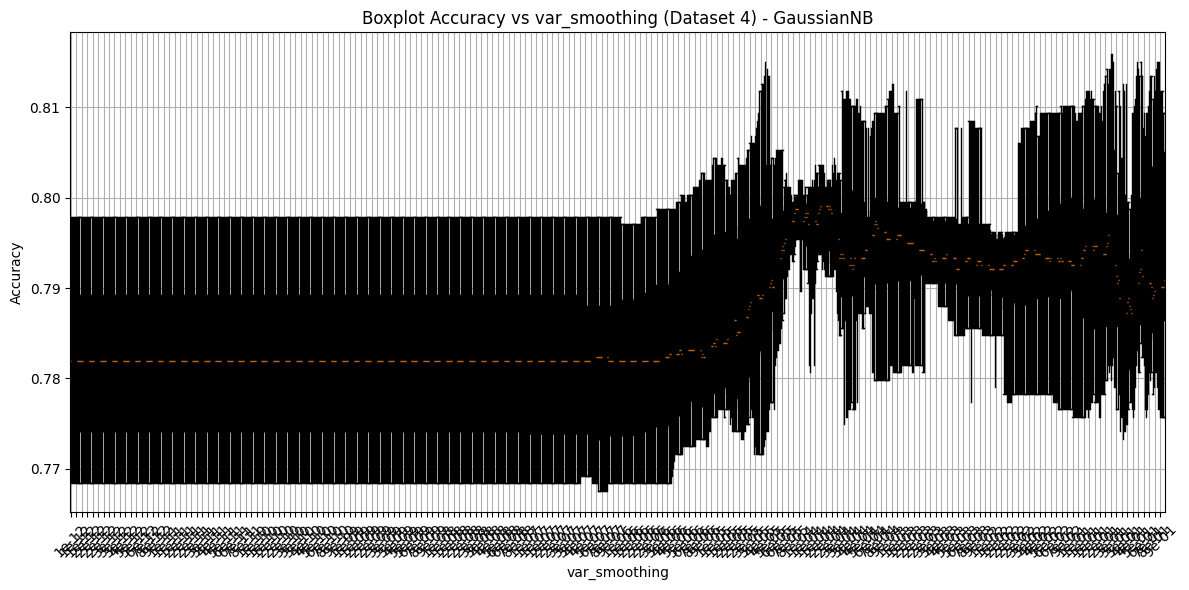

In [15]:
param_range = np.logspace(-12, 0, 1000)  # 100 valores entre 1e-12 y 1e-1
xdata = [x1, x2, x3, x4]
ydata = [y1, y2, y3, y4]
n_repeats = 10

for i in range(4):
    results = []
    for vs in param_range:
        accs = []
        for rep in range(n_repeats):
            x_train, x_test, y_train, y_test = train_test_split(xdata[i], ydata[i], test_size=0.2, random_state=rep)
            clf = GaussianNB(var_smoothing=vs)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            accs.append(accuracy_score(y_test, y_pred))
        results.append(accs)
    # Graficar boxplot
    plt.figure(figsize=(12, 6))
    plt.boxplot(results, positions=range(len(param_range)), showfliers=False)
    plt.xticks(ticks=range(0, len(param_range), 5), labels=[f'{v:.0e}' for v in param_range[::5]], rotation=45)
    plt.xlabel('var_smoothing')
    plt.ylabel('Accuracy')
    plt.title(f'Boxplot Accuracy vs var_smoothing (Dataset {i+1}) - GaussianNB')
    plt.grid(True)
    plt.tight_layout()
    plt.show()